In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import  confusion_matrix, accuracy_score, classification_report
import warnings
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
warnings.filterwarnings("ignore")

# Feature Engineering

In [3]:
df = pd.read_csv('data_bank_marketing_campaign.csv')
def contact_frequency(x):
    if x > 0 and x < 3:
        return "Rarely Contacted"
    elif x >= 3 and x <= 5:
        return "Moderately Contacted"
    else:
        return "Frequently Contacted"
df['contact_frequency'] = df['campaign'].apply(contact_frequency)
df['pdays'] = df['pdays'].apply(lambda x : 0 if x == -1 else x)
bin_edges = range(18, 100, 5) 
labels = [f"{start} - {start + 4}" for start in bin_edges[:-1]]
df['age_interval'] = pd.cut(df['age'], bins=bin_edges, labels=labels, right=False)
df['deposit'] = df['deposit'].apply(lambda x: 1 if x == 'yes' else 0)
df['debt'] = ((df['loan'] == 'yes') | (df['housing'] == 'yes')).astype(int)
df['difference_balance_and_average'] = np.abs(df['balance'] - df['balance'].mean())
df['poutcome_month'] = df['poutcome'] + '_' + df['month']
df['age_job'] = df['age'].astype(str) + '_' + df['job']
df['contact_month'] = df['contact'] + '_' + df['month']
df['balance_age_ratio'] = df['balance'] / df['age']
df['campaign_pdays'] = (df['campaign'] * -1) * df['pdays']
feature = df.drop(columns='deposit')
target = df['deposit']
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size = 0.2, random_state = 42, stratify= target)

# Model Usage

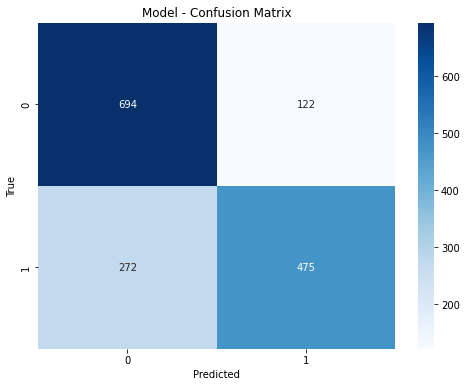

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.85      0.78       816
           1       0.80      0.64      0.71       747

    accuracy                           0.75      1563
   macro avg       0.76      0.74      0.74      1563
weighted avg       0.76      0.75      0.74      1563

Test Accuracy :  0.7479206653870761


In [4]:
import pickle

model_filepath = 'Capstone_Project_Modul3_model.pkl'
with open(model_filepath, 'rb') as file:
    loaded_model = pickle.load(file)

test_prediction = loaded_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_prediction)
cm = confusion_matrix(y_test, test_prediction)
classification_rep = classification_report(y_test, test_prediction)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Model - Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_rep)

print("Test Accuracy : ", test_accuracy)